In [225]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [226]:
#Trapezoid rule
def Traped(func,a,b,N):
    h=float(b-a)/int(N)
    result=h/2.0*(func(a)+func(b))
    for k in range(1,N):
        xk=a+k*h
        result+=h*func(xk)
    return result

In [227]:
#Simpson rule
def Simpson(func,a,b,N):
    if (int(N)%2)==0:
        h=float(b-a)/int(N)
        result=h*(1.0/3.0*func(a)+4.0/3.0*func(a+h)+1.0/3.0*func(b))
        for k in range(int(N/2)-1):
            xk = a + h*(2*(k+1))
            result += 2./3.*h*func(xk)+4./3.*h*func(xk+h)
        return result
    else:
        result = 0.5 *(Simpson(func,a,b,N-1)+Simpson(func,a,b,N+1))
        return result

In [228]:
#First integral function
def f1(x):
    return np.exp(-x)/x

In [229]:
#Second Integral function
def f2(x):
    return x*np.sin(x**(-1))

In [230]:
#while loop for Trapezoid rule until it reachs 1e-4 tolerance
#I1_orig=0.219384
a1=1.0        
b1=100.0
N=10     # firstly, number of intervals
relative_err=0.1   # Initial set for error
first_rez=2.0

Intervals_Trap=[]   # array to store number of intervals
I1_Trap_result=[]   # array to store Integral result
while abs(relative_err)>1e-4:  #out of loop if it reaches the tolerance
    Int1_Trap=Traped(f1,a1,b1,N) 
    Intervals_Trap.append(N)
    I1_Trap_result.append(Int1_Trap)
    relative_err=abs((Int1_Trap-first_rez)/first_rez)
    first_rez=Int1_Trap
    N*=2      # Interval is incremented 2 times
print('I1_Trap=',Int1_Trap) 


#while loop for Simpson rule until it reachs 1e-4 tolerance

first_rez=2.0
relative_err=0.1

Intervals_Simp=[]    
I1_Simp_result=[] 
N=10
while abs(relative_err)>1e-4:
    Int1_Simp=Simpson(f1,a1,b1,N)
    I1_Simp_result.append(Int1_Simp)
    relative_err=abs((Int1_Simp-first_rez)/first_rez)
    Intervals_Simp.append(N)
    first_rez=Int1_Simp
    N*=2
print('I1_Simp=',Int1_Simp)     

I1_Trap= 0.21938966524934725
I1_Simp= 0.21938508802907528


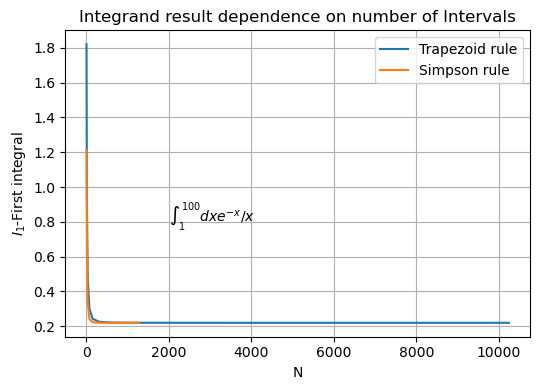

In [231]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5.5,4))
ax.plot(Intervals_Trap,I1_Trap_result,label='Trapezoid rule')
ax.plot(Intervals_Simp,I1_Simp_result,label='Simpson rule')
ax.set_title('Integrand result dependence on number of Intervals')
ax.set_ylabel('$I_1$-First integral')
ax.set_xlabel('N')
ax.legend(loc='best')
plt.grid()
fig.tight_layout()
plt.text(2000,0.8,'$\int_1^{100}dxe^{-x}/x$')
plt.show()


In [232]:
#I2_orig=0.378530
a2=0.000001
b2=1.0
N=10
relative_err=0.1
first_rez=2.0
Intervals_Trap_I2=[]
I2_Trap_result=[]
while abs(relative_err)>1e-4:  
    Int2_Trap=Traped(f2,a2,b2,N) 
    Intervals_Trap_I2.append(N)
    I2_Trap_result.append(Int2_Trap)
    relative_err=abs((Int2_Trap-first_rez)/first_rez)
    first_rez=Int2_Trap
    N*=2
print('I2_Trap=',Int2_Trap)

first_rez=3.0
relative_err=2.0

Intervals_Simp_I2=[]    
I2_Simp_result=[] 
N=10
while abs(relative_err)>1e-4:
    Int2_Simp=Simpson(f2,a2,b2,N)
    I2_Simp_result.append(Int2_Simp)
    relative_err=abs((Int2_Simp-first_rez)/first_rez)
    Intervals_Simp_I2.append(N)
    first_rez=Int2_Simp
    N*=2
print('I2_Simp=',Int2_Simp) 

I2_Trap= 0.3785339377637038
I2_Simp= 0.378551779919822


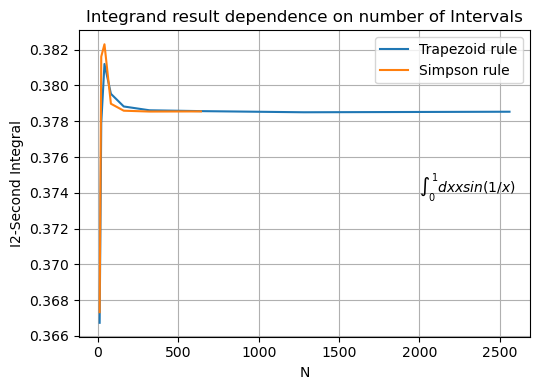

In [233]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(5.5,4))
ax.plot(Intervals_Trap_I2,I2_Trap_result,label='Trapezoid rule')
ax.plot(Intervals_Simp_I2,I2_Simp_result,label='Simpson rule')
ax.set_title('Integrand result dependence on number of Intervals')
ax.set_ylabel('I2-Second Integral')
ax.set_xlabel('N')
ax.legend(loc='best')
plt.grid()
fig.tight_layout()
plt.text(2000,0.374,'$\int_0^1dxxsin(1/x)$')
plt.show()